In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [25]:
train = pd.read_csv("./train.csv")
test_images = (pd.read_csv("./test.csv").values).astype('float32')

In [26]:
train_images = (train.ix[:, 1:].values).astype('float32')
train_labels = train['label'].values.astype('int32')

/home/anirban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [27]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [28]:
train_images.shape

(42000, 784)

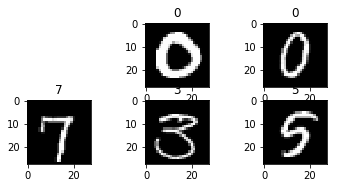

In [29]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

for i in range(4,9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [30]:
train_images = train_images.reshape((42000, 28 * 28))


In [31]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [32]:
train_images = train_images/255
test_images = test_images/255

In [33]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

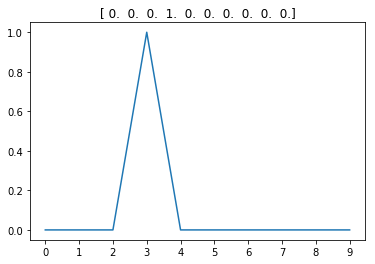

In [34]:
plt.title(train_labels[9])
plt.plot(train_labels[9])
plt.xticks(range(10));

In [35]:
seed = 43
np.random.seed(seed)

In [36]:
train_images.shape

(42000, 784)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K

In [41]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=(28*28)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28*28)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



TypeError: 'int' object is not iterable

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

NameError: name 'keras' is not defined

In [19]:
from keras.optimizers import RMSprop

In [20]:
model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
history=model.fit(train_images, train_labels, validation_split=0.05,
                 epochs=25, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 4s 109us/step - loss: 0.5775 - acc: 0.8327 - val_loss: 0.3150 - val_acc: 0.9138
Epoch 2/25
39900/39900 [==============================] - 5s 114us/step - loss: 0.2526 - acc: 0.9277 - val_loss: 0.2442 - val_acc: 0.9362
Epoch 3/25
21504/39900 [===============>..............] - ETA: 2s - loss: 0.2146 - acc: 0.9378

KeyboardInterrupt: 

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)


Text(0,0.5,'Loss')

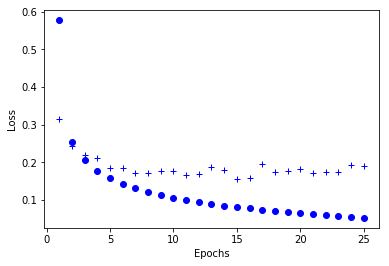

In [24]:
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [25]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

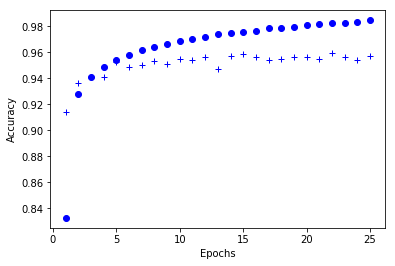

In [26]:
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(28*28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=15, batch_size=64)

Epoch 1/15
42000/42000 [==============================] - 5s 122us/step - loss: 1.2359 - acc: 0.6258
Epoch 2/15
42000/42000 [==============================] - 6s 135us/step - loss: 0.4880 - acc: 0.8578
Epoch 3/15
42000/42000 [==============================] - 6s 138us/step - loss: 0.3681 - acc: 0.8922
Epoch 4/15
42000/42000 [==============================] - 6s 139us/step - loss: 0.3130 - acc: 0.9090
Epoch 5/15
42000/42000 [==============================] - 5s 128us/step - loss: 0.2717 - acc: 0.9208
Epoch 6/15
42000/42000 [==============================] - 5s 128us/step - loss: 0.2464 - acc: 0.9283
Epoch 7/15
42000/42000 [==============================] - 5s 127us/step - loss: 0.2220 - acc: 0.9346
Epoch 8/15
42000/42000 [==============================] - 6s 132us/step - loss: 0.2089 - acc: 0.9383
Epoch 9/15
42000/42000 [==============================] - 5s 129us/step - loss: 0.1894 - acc: 0.9441
Epoch 10/15
42000/42000 [==============================] - 6s 135us/step - loss: 0.1785 - a

In [28]:
predictions = model.predict_classes(test_images, verbose=0)
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.to_csv("DRa.csv", index=False, header=True)

In [32]:
'''import numpy as np
from keras.layers import Dense , Dropout , Activation ,Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D

model=Sequential()
model.add(Conv2D(32 , (5,5) , input_dim= (28*28) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense (128 , activation='relu'))
model.add(Dense(num_classes , activation='softmax'))
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=15, batch_size=64)'''
    

TypeError: ('Keyword argument not understood:', 'input_dim')